### Necessary Imports

In [1]:
import pandas as pd
import numpy as np

#imports from extract function words 
import os
import os.path
import re
import string
import collections
import math
from collections import Counter
import random

# plotting 
import seaborn as sns
from matplotlib import pyplot as plt

### Sklearn Imports

In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Data Loading

In [3]:
frequentwords = ['a', 'all', 'also', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', 'do', 'down', 'even', 'every', 'for', 'from', 'had', 'has', 'have', 'her', 'his', 'if', 'in', 'into', 'is', 'it', 'its', 'may', 'more', 'must', 'my', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'our', 'shall', 'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'then', 'there', 'things', 'this', 'to', 'up', 'upon', 'was', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'your']

path = '../data/Raw/blogs/blogs/'
files = os.listdir(path)
files.sort() 

df = pd.read_csv('../data/Processed/dataframe_2.csv')
df = df.sort_values('total_words', ascending = False)

### Get Train Test function

In [4]:
def get_train_test_sample(df,train_n,test_n,take):
    target = train_n+test_n
    temp = df[df['total_words'] >= target].head(take)
    train_vecs = [] 
    test_vecs = [] 
    ids = []
    for i in temp.iterrows():
        words = i[1][-1] - i[1][-2]
 
        random_words =random.sample([i for i in range(0,words)],train_n)

        trvec = [] 
        prev_len = 0
        for x in i[1].index:
            if np.isin(x,frequentwords) == True:
                size = i[1][x]
                count = [i for i in random_words if prev_len <= i < prev_len + size ]
                prev_len = size
                trvec.append(len(count))

        random_words = random.sample(list(range(0,words)),test_n)

        tevec = [] 
        prev_len = 0
        for x in i[1].index:
            if np.isin(x,frequentwords) == True:
                size = i[1][x]
                count = [i for i in random_words if prev_len <= i < prev_len + size ]
                prev_len = size
                tevec.append(len(count))

        ids.append(i[1][0])
        test_vecs.append(tevec)
        train_vecs.append(trvec)
    return([ids,test_vecs,train_vecs])

## Varying train test split

In [8]:
trains = []
tests = []
ys = []


authors = [20,50,100]
trainset = [2000,3000,5000,10000]
testset = [1/5,1/3,1]
for a in authors:
    for t in trainset:
        for ts in testset:
            print(ts,t,a)
            ids,test,train = get_train_test_sample(df,t,int(t*ts),a)
            X_test = pd.DataFrame(test)
            X_train = pd.DataFrame(train)
            y = ids

            trains.append(X_train)
            tests.append(X_test)
            ys.append(y)

0.2 2000 20
0.3333333333333333 2000 20
1 2000 20
0.2 3000 20
0.3333333333333333 3000 20
1 3000 20
0.2 5000 20
0.3333333333333333 5000 20
1 5000 20
0.2 10000 20
0.3333333333333333 10000 20
1 10000 20
0.2 2000 50
0.3333333333333333 2000 50
1 2000 50
0.2 3000 50
0.3333333333333333 3000 50
1 3000 50
0.2 5000 50
0.3333333333333333 5000 50
1 5000 50
0.2 10000 50
0.3333333333333333 10000 50
1 10000 50
0.2 2000 100
0.3333333333333333 2000 100
1 2000 100
0.2 3000 100
0.3333333333333333 3000 100
1 3000 100
0.2 5000 100
0.3333333333333333 5000 100
1 5000 100
0.2 10000 100
0.3333333333333333 10000 100
1 10000 100


In [9]:
knn_predictions = []

In [10]:
for j in range (0,len(trains)):
    
    X_train = trains[j]
    X_test = tests[j]
    y = ys[j]

    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    knn_model = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 1)

    knn_model.fit(X_train,y)
    k_predictions = knn_model.predict(X_test)
    knn_predictions.append(sum(np.where(y-k_predictions == 0,1,0))/len(k_predictions))

In [16]:
authors = [20,50,100]
trainset = [2000,3000,5000,10000]
testset = [1/5,1/3,1]


df_plot = pd.DataFrame({'acc' : knn_predictions,'authors' : np.repeat(authors,12)})

In [35]:
train_words = list(np.repeat(trainset,3)) 

df_plot.loc[:,'train_words'] = train_words*3

In [37]:
df_plot.loc[:,'test_words'] = testset*12

In [51]:
df_plot['plot_metric'] = df_plot.train_words*df_plot.test_words

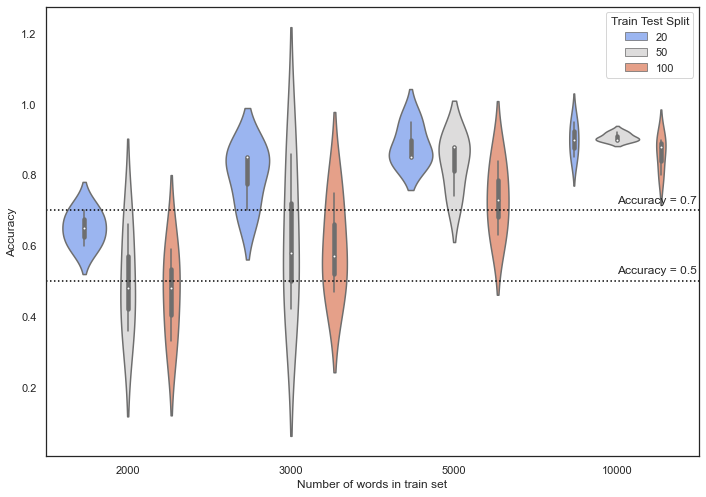

In [115]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_plot.test_words = np.round(df_plot.test_words,2)
sns.set_style ('white')
sns.violinplot(data = df_plot,x= 'train_words',y='acc',hue = 'authors', palette = 'coolwarm',height=6, aspect=8/6)
plt.axhline(y = 0.5, color = 'black', linestyle = ':')
plt.axhline(y = 0.7, color = 'black', linestyle = ':')
plt.text(x = 3, y = 0.52, s = 'Accuracy = 0.5')
plt.text(x = 3, y = 0.72, s = 'Accuracy = 0.7')
plt.rc('font', size=40) 
plt.xlabel('Number of words in train set')
plt.ylabel('Accuracy')
plt.legend(title = 'Train Test Split')